# Pandas

This notebook covers a _lot_, go through it carefully and _read_ the code. Then work on _understanding_ it. Then apply it to your data set. Then once you've done that, you'll probably _actually_ understand it.

Messing about with the [NSW Penalty data](http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv)

`imports`, you've seen this before!

In [3]:
import os
import os.path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

%matplotlib inline

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [5]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [6]:
hdf = pd.read_csv("housing_in_london_yearly_variables (version 1).csv")
print("done")

done


In [7]:
hdf.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000002,barking and dagenham,01/12/1999,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,01/12/2000,22618.0,NaN,24696,4,163893.0,57000.0,NaN,NaN,1
2,E09000002,barking and dagenham,01/12/2001,22323.0,NaN,26050,3,165654.0,54000.0,3780.0,68298.0,1
3,E09000002,barking and dagenham,01/12/2002,24813.0,NaN,26653,3,166357.0,52000.0,3780.0,68526.0,1
4,E09000002,barking and dagenham,01/12/2003,25358.0,NaN,27792,5,166210.0,55000.0,3780.0,68837.0,1


In [8]:
def cast_to_number(value):
    try:
        return pd.to_numeric(value)
    except Exception as e:
        print(value, e)

hdf["recycling_pct"] = hdf["recycling_pct"].apply(cast_to_number)
hdf["mean_salary"] = hdf["mean_salary"].apply(cast_to_number)
hdf["median_salary"] = hdf["median_salary"].apply(cast_to_number)
hdf.head()

na Unable to parse string "na" at position 0
# Unable to parse string "#" at position 0
# Unable to parse string "#" at position 0
# Unable to parse string "#" at position 0
# Unable to parse string "#" at position 0
# Unable to parse string "#" at position 0
- Unable to parse string "-" at position 0
- Unable to parse string "-" at position 0
- Unable to parse string "-" at position 0
- Unable to parse string "-" at position 0
- Unable to parse string "-" at position 0
# Unable to parse string "#" at position 0
# Unable to parse string "#" at position 0
- Unable to parse string "-" at position 0
- Unable to parse string "-" at position 0
- Unable to parse string "-" at position 0
- Unable to parse string "-" at position 0
- Unable to parse string "-" at position 0


,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000002,barking and dagenham,01/12/1999,21480.0,NaN,23620.0,3.0,162444.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,01/12/2000,22618.0,NaN,24696.0,4.0,163893.0,57000.0,NaN,NaN,1
2,E09000002,barking and dagenham,01/12/2001,22323.0,NaN,26050.0,3.0,165654.0,54000.0,3780.0,68298.0,1
3,E09000002,barking and dagenham,01/12/2002,24813.0,NaN,26653.0,3.0,166357.0,52000.0,3780.0,68526.0,1
4,E09000002,barking and dagenham,01/12/2003,25358.0,NaN,27792.0,5.0,166210.0,55000.0,3780.0,68837.0,1


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

We can also get the list of columns out of the data frame

In [9]:
hdf.columns

Index(['code', 'area', 'date', 'median_salary', 'life_satisfaction',
       'mean_salary', 'recycling_pct', 'population_size', 'number_of_jobs',
       'area_size', 'no_of_houses', 'borough_flag'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the iloc property.

This gives us the row as a _Series_.

↓

In [10]:
row_one = hdf.iloc[1]
row_one

code                            E09000002
area                 barking and dagenham
date                           01/12/2000
median_salary                       22618
life_satisfaction                     NaN
mean_salary                         24696
recycling_pct                           4
population_size                    163893
number_of_jobs                      57000
area_size                             NaN
no_of_houses                          NaN
borough_flag                            1
Name: 1, dtype: object

Series objects are _very_ similar to dictionaries. They have more properties though.

In [11]:
row_one["date"]

'01/12/2000'

Doing the same thing on a dataframe gives us the whole column

In [12]:
hdf["area"]

0           barking and dagenham
1           barking and dagenham
2           barking and dagenham
3           barking and dagenham
4           barking and dagenham
                  ...           
1066    yorkshire and the humber
1067    yorkshire and the humber
1068    yorkshire and the humber
1069    yorkshire and the humber
1070    yorkshire and the humber
Name: area, Length: 1071, dtype: object

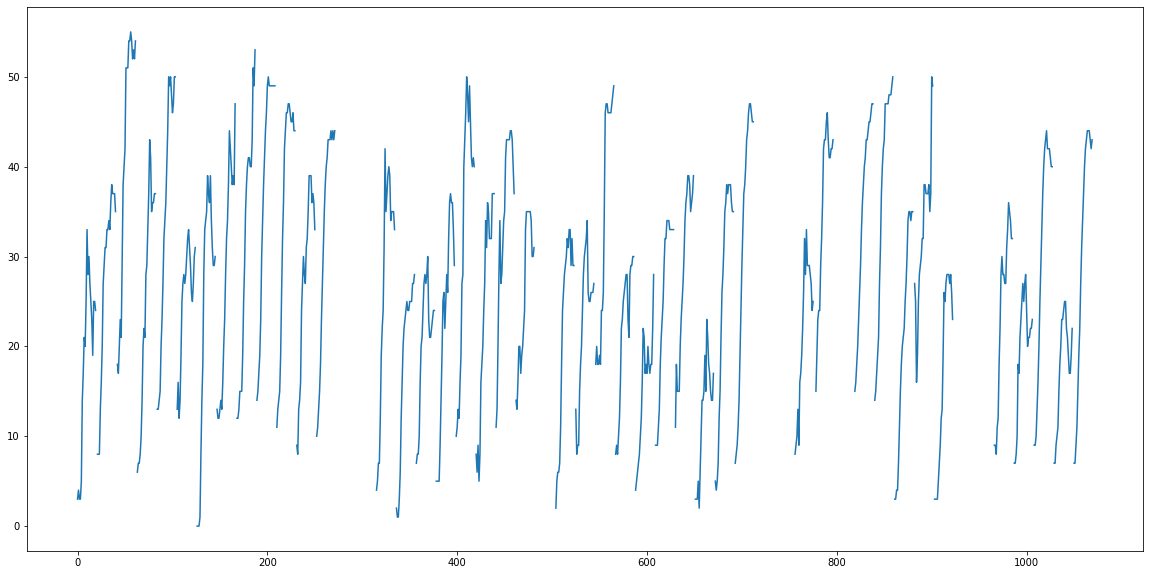

In [13]:
hdf["recycling_pct"].plot()

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

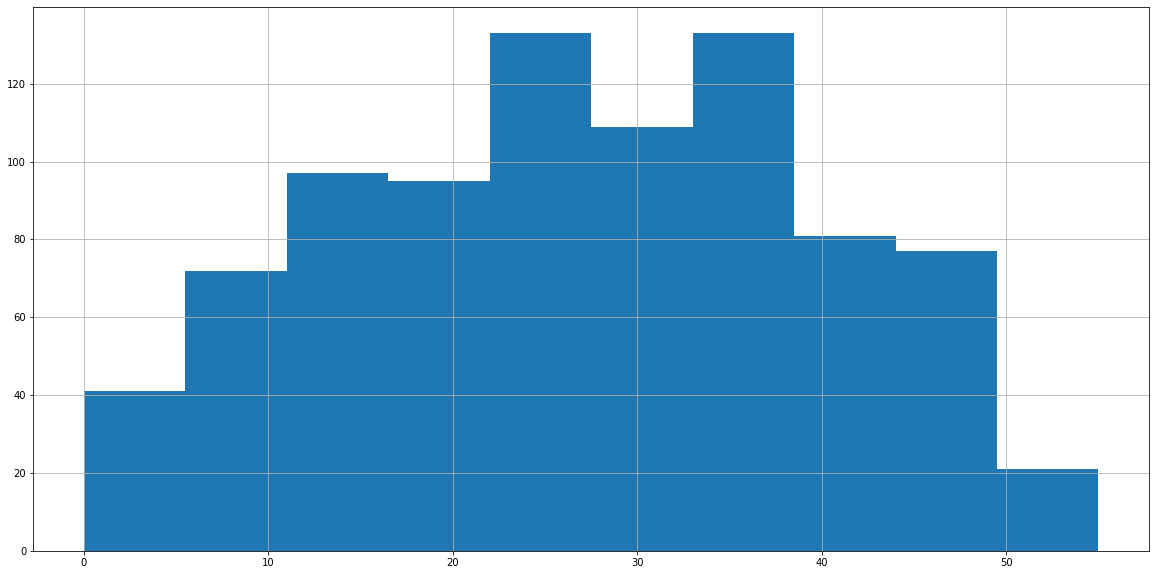

In [14]:
hdf["recycling_pct"].hist()

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, boolean indexing:

In [15]:
# hdf["FACE_VALUE"][hdf["FACE_VALUE"] < 3000].hist()

In [16]:
year99 = hdf[["1999" in x for x in hdf.date]]
year99.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000002,barking and dagenham,01/12/1999,21480.0,NaN,23620.0,3.0,162444.0,NaN,NaN,NaN,1
21,E09000003,barnet,01/12/1999,19568.0,NaN,23128.0,8.0,313469.0,NaN,NaN,NaN,1
42,E09000004,bexley,01/12/1999,18621.0,NaN,21386.0,18.0,217458.0,NaN,NaN,NaN,1
63,E09000005,brent,01/12/1999,18532.0,NaN,20911.0,6.0,260317.0,NaN,NaN,NaN,1
84,E09000006,bromley,01/12/1999,16720.0,NaN,21293.0,13.0,294902.0,NaN,NaN,NaN,1


In [17]:
year2019 = hdf[["2019" in x for x in hdf.date]]
year2019.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
20,E09000002,barking and dagenham,01/12/2019,28738.0,NaN,32010.0,NaN,NaN,NaN,NaN,NaN,1
41,E09000003,barnet,01/12/2019,31624.0,NaN,37328.0,NaN,NaN,NaN,NaN,NaN,1
62,E09000004,bexley,01/12/2019,31642.0,NaN,33978.0,NaN,NaN,NaN,NaN,NaN,1
83,E09000005,brent,01/12/2019,31739.0,NaN,36816.0,NaN,NaN,NaN,NaN,NaN,1
104,E09000006,bromley,01/12/2019,NaN,NaN,37564.0,NaN,NaN,NaN,NaN,NaN,1


In [18]:
year2018 = hdf[["2018" in x for x in hdf.date]]
year2018.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
19,E09000002,barking and dagenham,01/12/2018,29995.0,7.52,32671.0,24.0,211998.0,66000.0,3780.0,74923.0,1
40,E09000003,barnet,01/12/2018,29927.0,7.55,36776.0,35.0,392140.0,170000.0,8675.0,150737.0,1
61,E09000004,bexley,01/12/2018,NaN,7.54,34496.0,54.0,247258.0,87000.0,6429.0,97905.0,1
82,E09000005,brent,01/12/2018,30366.0,7.71,35830.0,37.0,330795.0,157000.0,4323.0,118707.0,1
103,E09000006,bromley,01/12/2018,30762.0,7.57,35201.0,50.0,331096.0,127000.0,15013.0,138976.0,1


In [19]:
year99.shape

(51, 12)

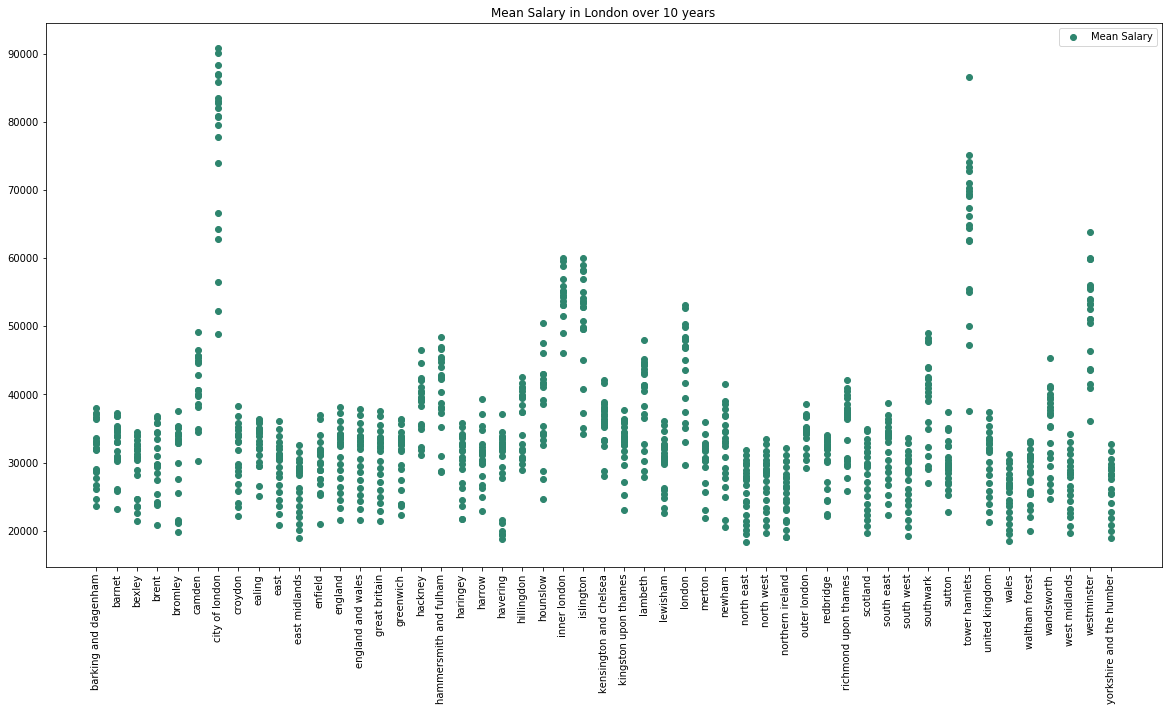

In [122]:
plt.scatter(hdf.area, hdf.mean_salary, color = "#2E856E", label = "Mean Salary")
plt.legend()
plt.title("Mean Salary in London over 10 years")
plt.xticks(ticks=mslocation, labels=year99.area, rotation = "vertical");

In [21]:
year99salary = year99[["area", "median_salary", "mean_salary"]]
year99salary.dropna(inplace=True)
year99salary.head()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,area,median_salary,mean_salary
0,barking and dagenham,21480.0,23620.0
21,barnet,19568.0,23128.0
42,bexley,18621.0,21386.0
63,brent,18532.0,20911.0
84,bromley,16720.0,21293.0


In [22]:
x = year99salary.median_salary.to_numpy().reshape((-1, 1))

In [23]:
y = year99salary.mean_salary

In [24]:
model = LinearRegression()
model.fit(x, y)

year99salary["modelled"] = model.predict(x)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [25]:
year99salary["delta"] = year99salary.apply(lambda row: abs(row.mean_salary - row.modelled), axis=1)

year99salary.head(10)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,area,median_salary,mean_salary,modelled,delta
0,barking and dagenham,21480.0,23620.0,26782.484230,3162.484230
21,barnet,19568.0,23128.0,23442.885110,314.885110
42,bexley,18621.0,21386.0,21788.805420,402.805420
63,brent,18532.0,20911.0,21633.353369,722.353369
84,bromley,16720.0,21293.0,18468.419475,2824.580525
105,camden,23677.0,30249.0,30619.879244,370.879244
126,city of london,33020.0,48922.0,46938.851304,1983.148696
147,croydon,19563.0,22205.0,23434.151849,1229.151849
168,ealing,20580.0,25046.0,25210.497197,164.497197
189,east,18000.0,20866.0,20704.134367,161.865633


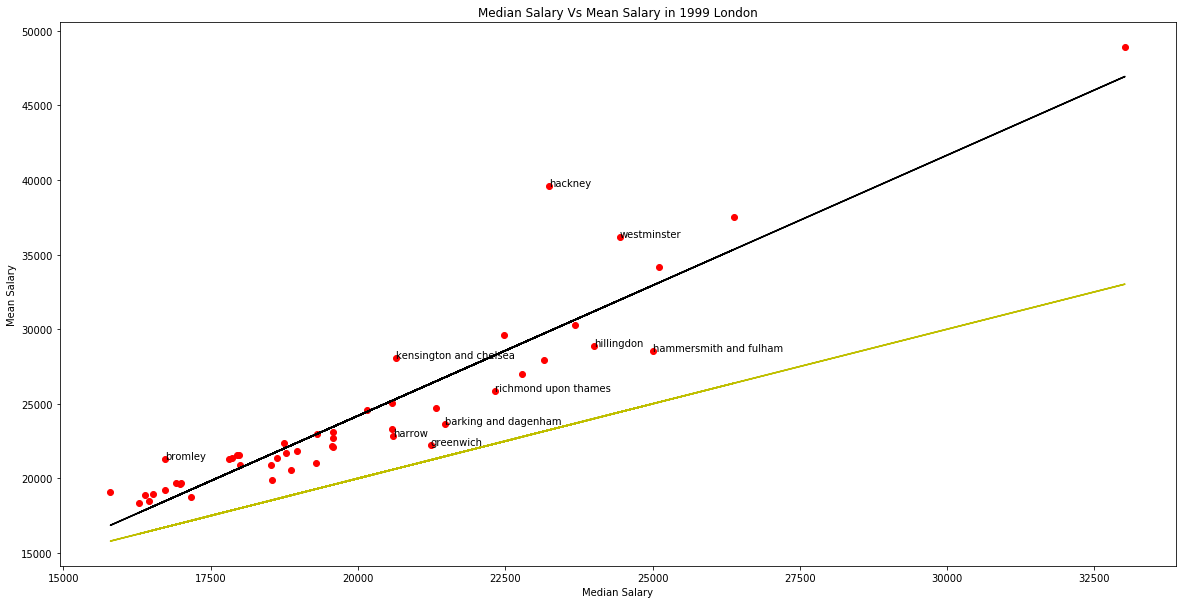

In [26]:
plt.scatter(x, y, color='r')
# Plot the regression line
plt.plot(x, year99salary.modelled, color='k')
# Plot a parity line
plt.plot(x, x, color='y')


topNbyInequality = year99salary.sort_values(by="delta", ascending=False)[0:10]
for i, row in list(topNbyInequality.iterrows()):
    plt.annotate(row.area, (row.median_salary, row.mean_salary))

plt.title("Median Salary Vs Mean Salary in 1999 London")
plt.xlabel("Median Salary")
plt.ylabel("Mean Salary")
plt.show()

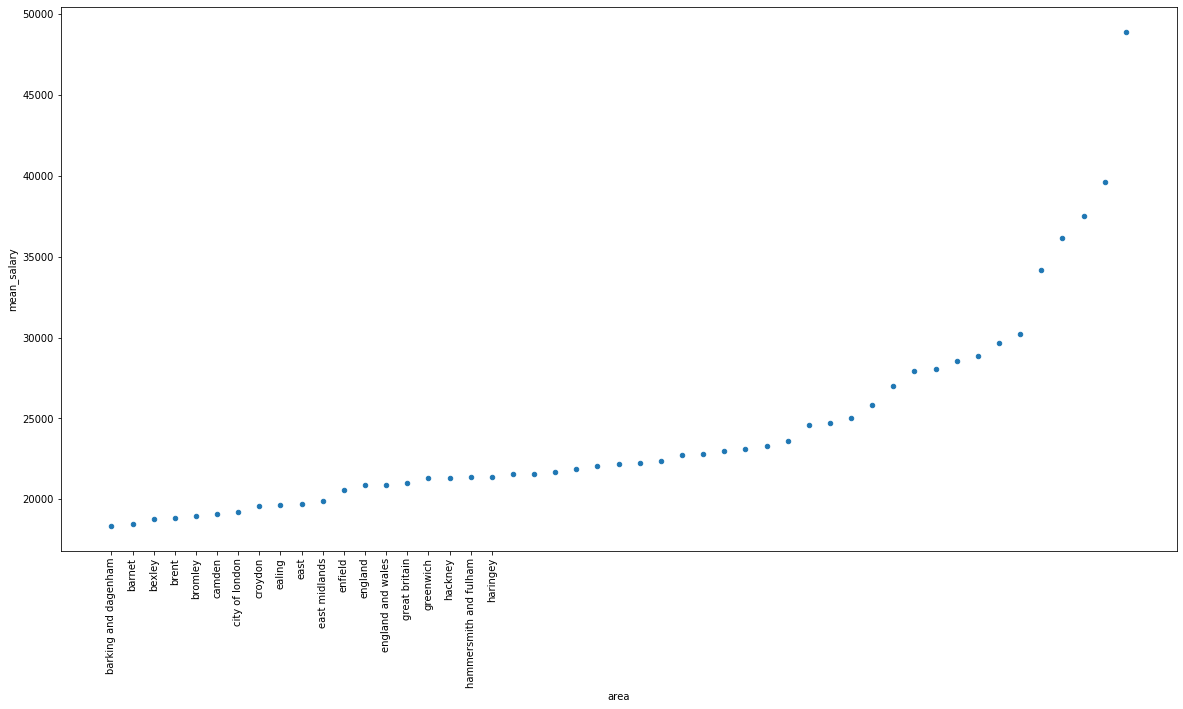

In [97]:
year99.sort_values('mean_salary').plot(kind='scatter', x ='area', y='mean_salary')
plt.xticks(ticks=mslocation, labels=year99.area, rotation = "vertical");

Text(0, 0.5, 'Salary')

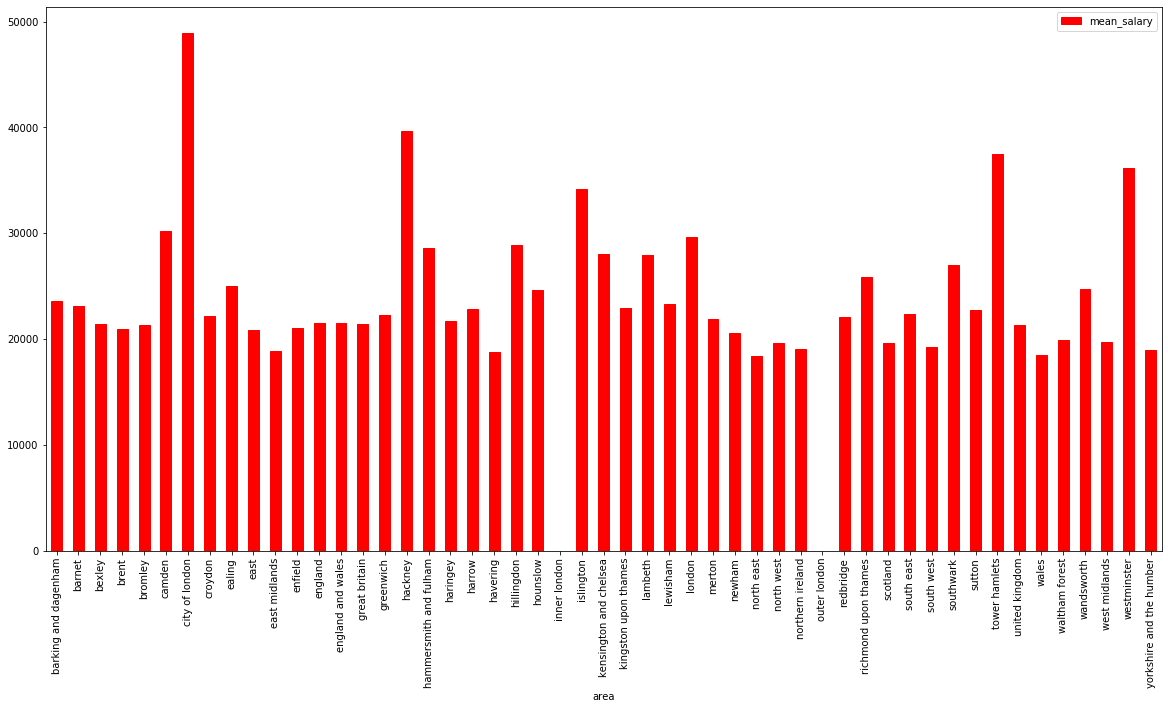

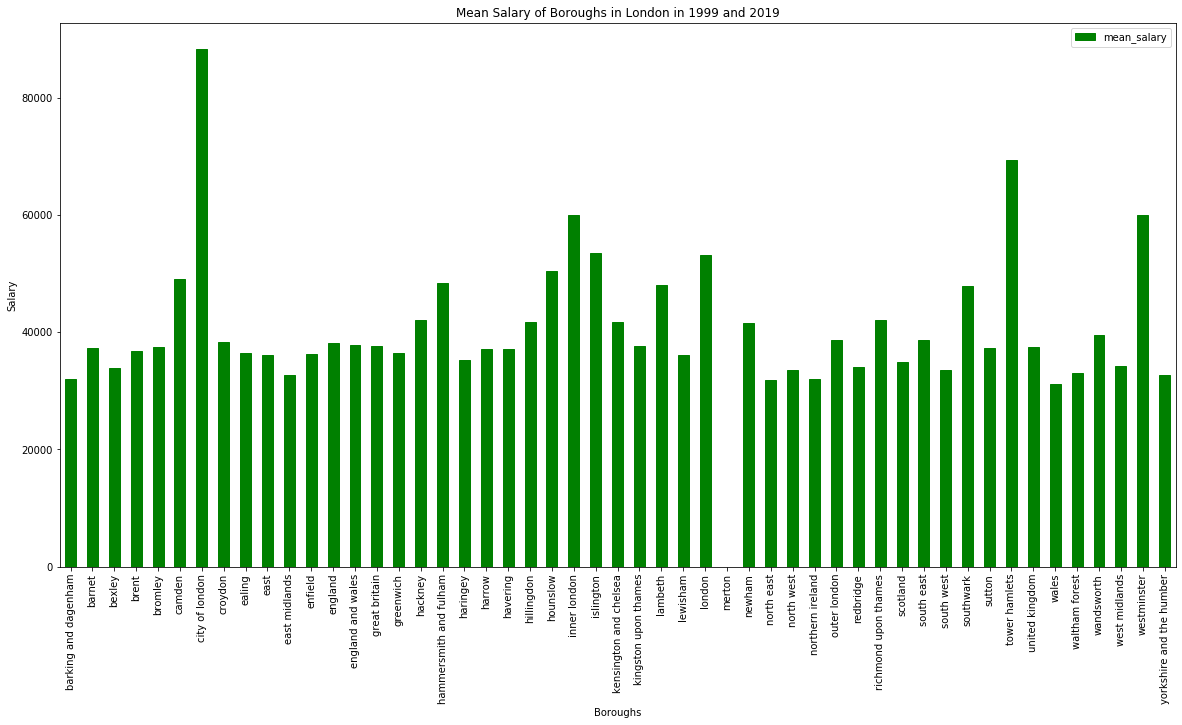

In [34]:
X = np.arange(len(year99.mean_salary))
year99.plot(kind='bar', x ='area', y='mean_salary', Color = "Red" )
year2019.plot(kind='bar', x ='area', y='mean_salary', Color = "green")
plt.title("Mean Salary of Boroughs in London in 1999 and 2019")
plt.xlabel('Boroughs')
plt.ylabel('Salary')



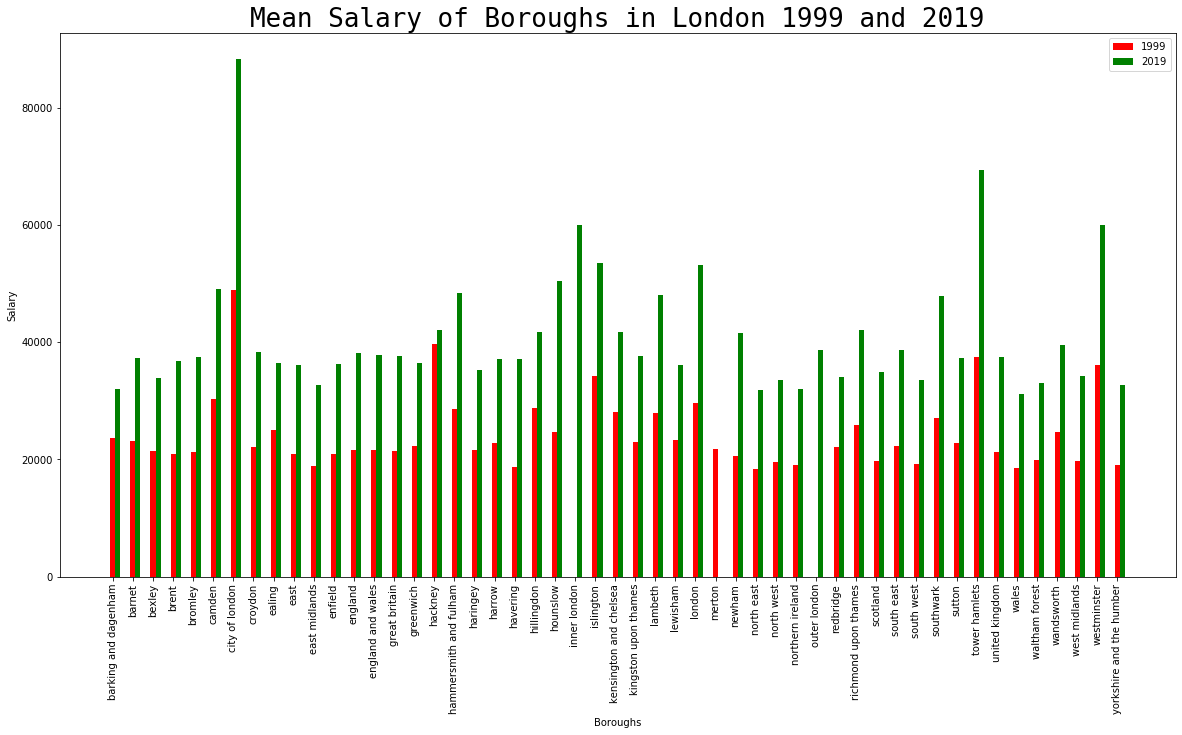

In [121]:
mslocation = np.arange(len(year99.mean_salary))
plt.bar(mslocation, year99.mean_salary, color = 'red', width = 0.25, label = "1999")
plt.bar(mslocation + 0.25, year2019.mean_salary, color = 'green', width = 0.25, label = "2019")
plt.xticks(ticks=mslocation, labels=year99.area, rotation = "vertical")
plt.legend()
plt.title("Mean Salary of Boroughs in London 1999 and 2019", fontsize=26,  family = 'monospace')
plt.xlabel('Boroughs')
plt.ylabel('Salary')
plt.show()

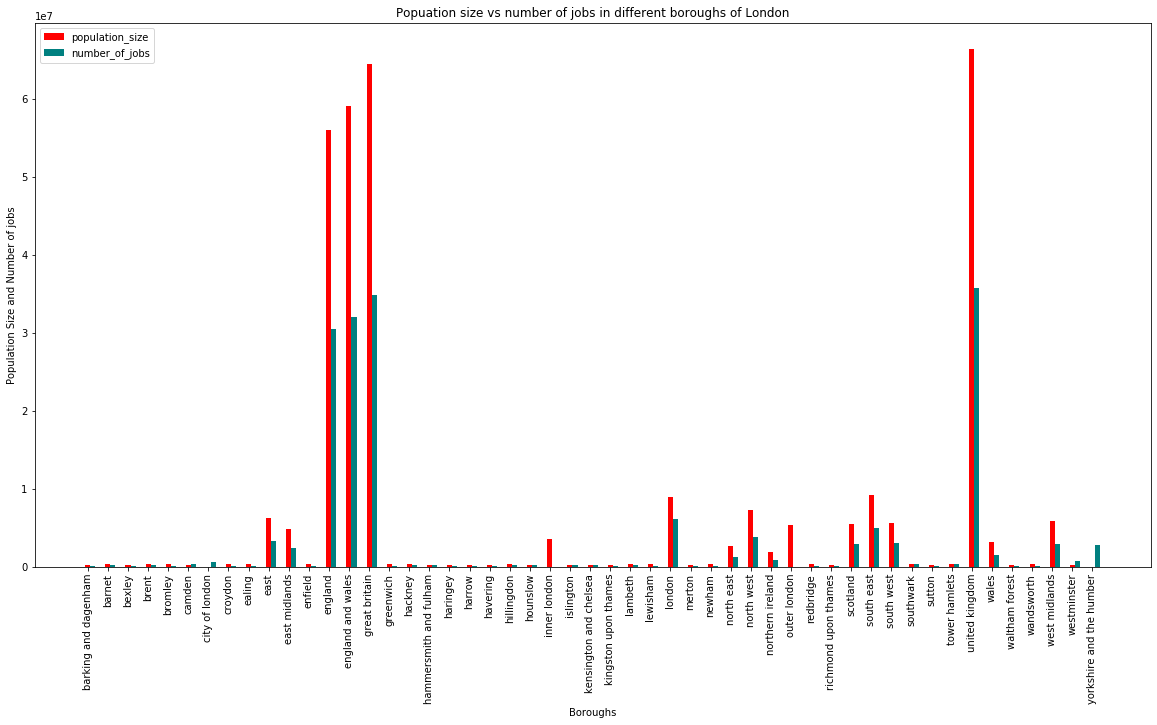

In [112]:
small18 = year2018[year2018.population_size < 300000 ]
mslocation = np.arange(len(year2018.population_size))
plt.bar(mslocation, year2018.population_size, color = 'red', width = 0.25, label = "population_size")
plt.bar(mslocation + 0.25, year2018.number_of_jobs, color = 'teal', width = 0.25, label = "number_of_jobs")
plt.xticks(ticks=mslocation, labels=year99.area, rotation = "vertical")
plt.xlabel('Boroughs')
plt.ylabel('Population Size and Number of jobs')
plt.title("Popuation size vs number of jobs in different boroughs of London")

plt.legend()

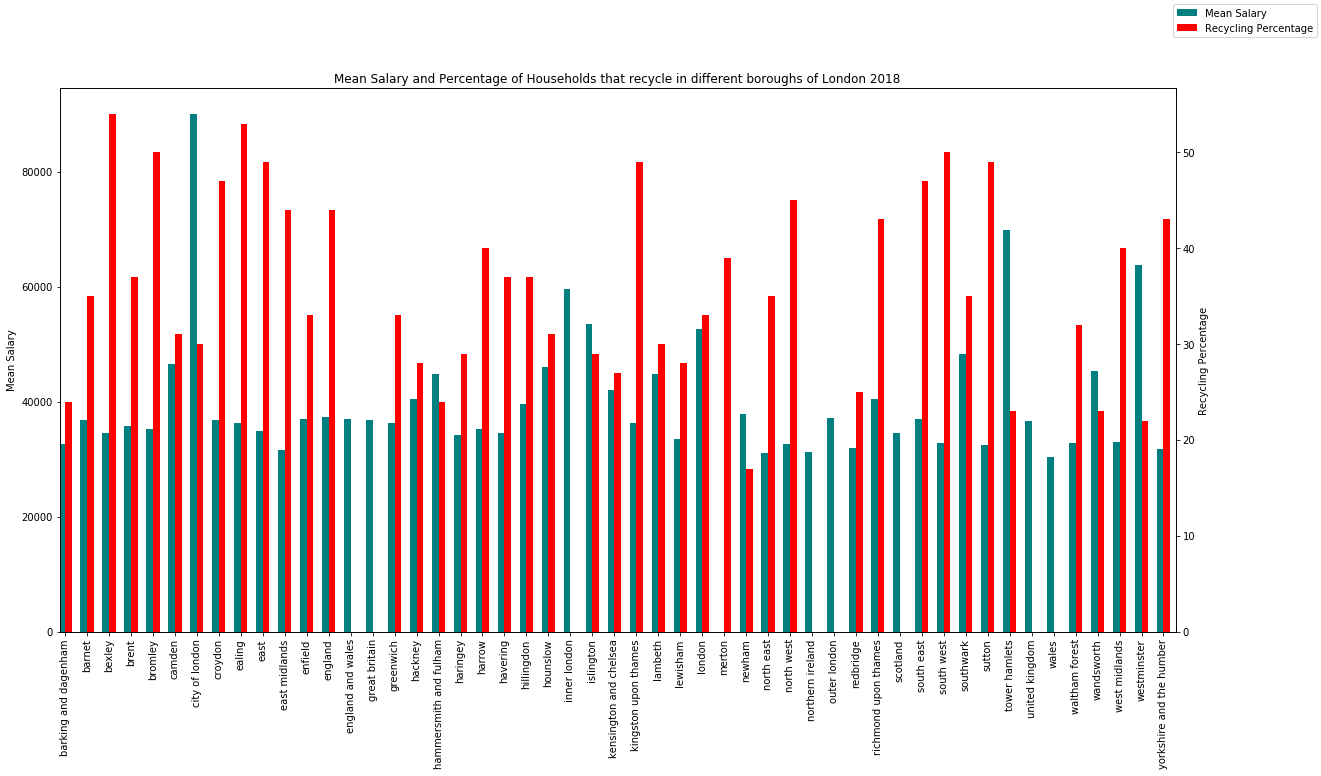

In [36]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot() # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.3
year2018.mean_salary.plot(kind='bar', color='teal', ax=ax, width=width, position=1, label = "Mean Salary")
year2018.recycling_pct.plot(kind='bar', color='red', ax=ax2, width=width, position=0, label = "Recycling Percentage")
fig.legend()
plt.xticks(ticks=mslocation, labels=year99.area, rotation = "vertical")
plt.title("Mean Salary and Percentage of Households that recycle in different boroughs of London 2018")
ax.set_ylabel('Mean Salary')
ax2.set_ylabel('Recycling Percentage')
plt.show()

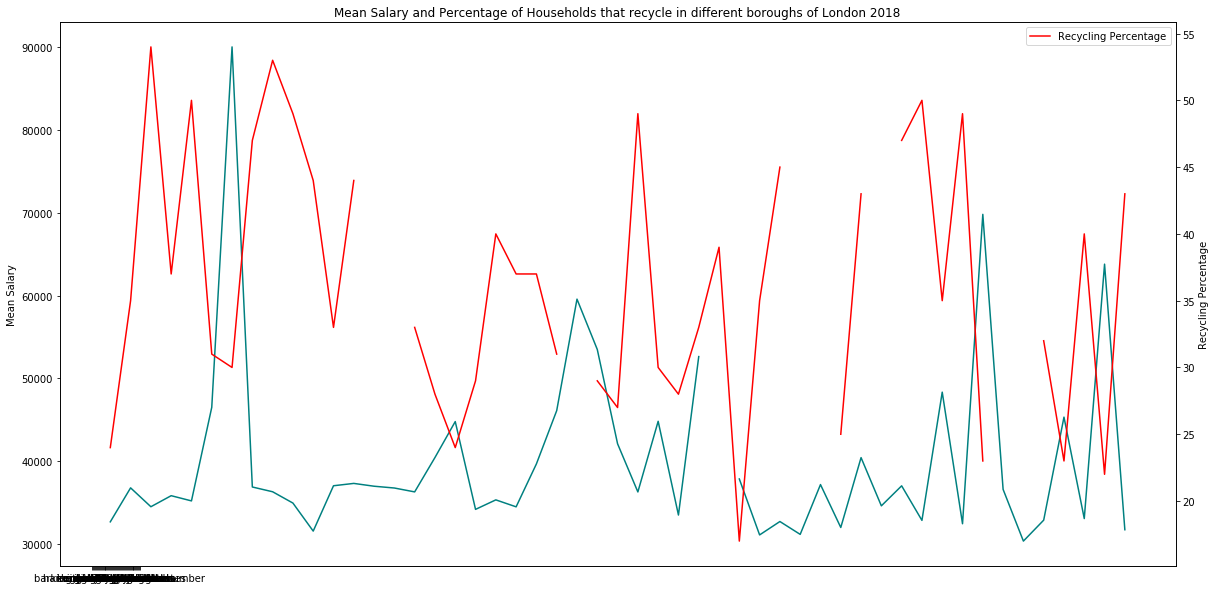

In [32]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot() # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.



year2018.mean_salary.plot(kind='line', color='teal', ax=ax, label = "Mean Salary")
year2018.recycling_pct.plot(kind='line', color='red', ax=ax2, label = "Recycling Percentage")
plt.xticks(ticks=mslocation, labels=year99.area, rotation = "vertical")
plt.legend()

plt.title("Mean Salary and Percentage of Households that recycle in different boroughs of London 2018")

ax.set_ylabel('Mean Salary')
ax2.set_ylabel('Recycling Percentage')

plt.show()

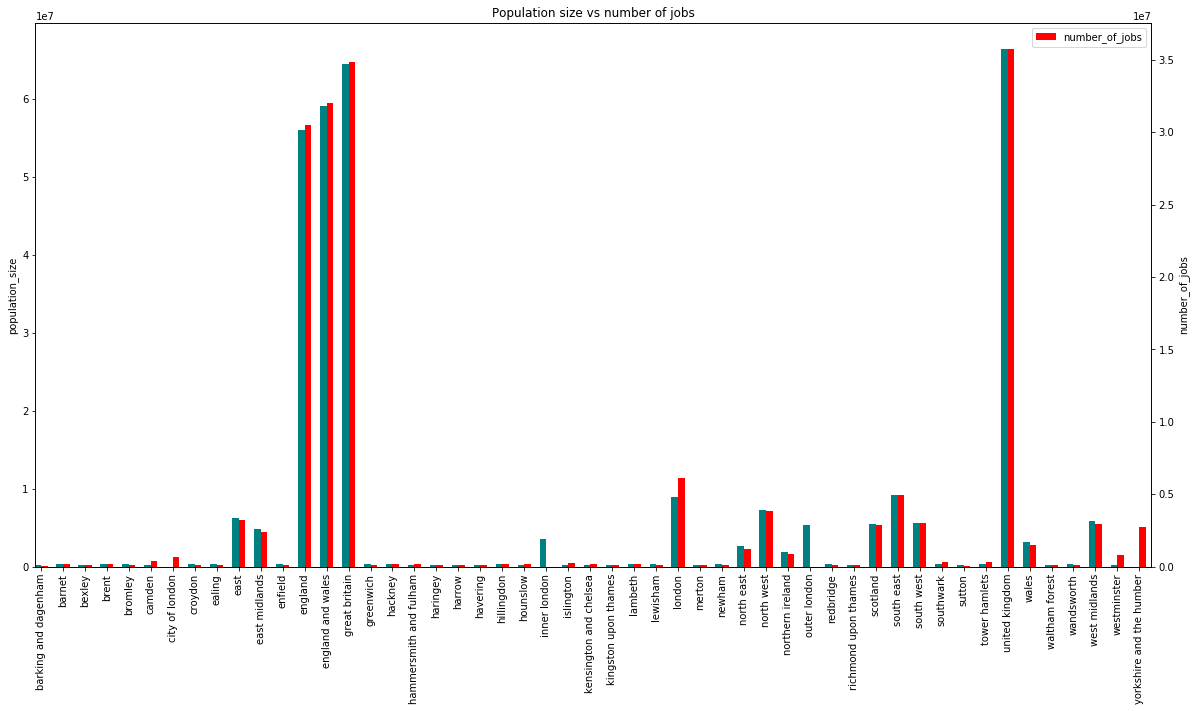

In [33]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot() # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

year2018.population_size.plot(kind='bar', color='teal', ax=ax, width=width, position=1, label = "population_size")
year2018.number_of_jobs.plot(kind='bar', color='red', ax=ax2, width=width, position=0, label = "number_of_jobs")
plt.legend()
plt.xticks(ticks=mslocation, labels=year99.area, rotation = "vertical")
plt.title("Population size vs number of jobs")

ax.set_ylabel('population_size')
ax2.set_ylabel('number_of_jobs')

plt.show()

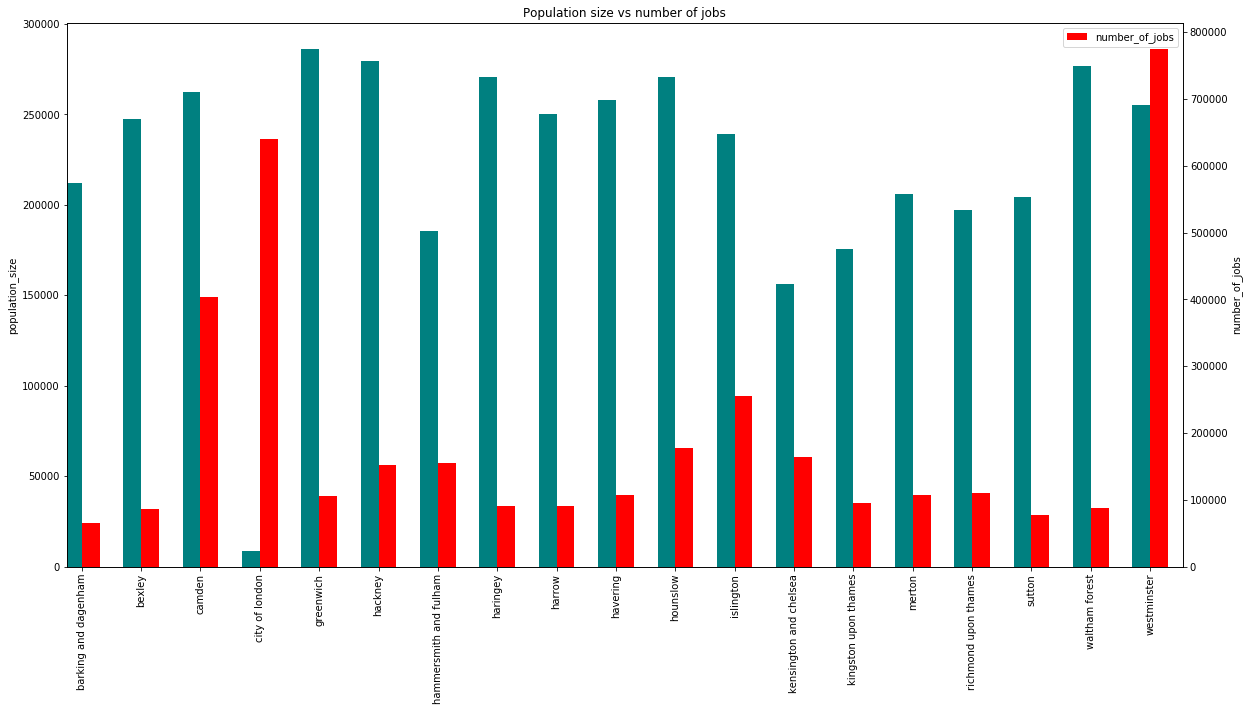

In [96]:
small18 = year2018[year2018.population_size < 300000 ]
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot() # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

small18.population_size.plot(kind='bar', color='teal', ax=ax, width=width, position=1,label = "population_size")
small18.number_of_jobs.plot(kind='bar', color='red', ax=ax2, width=width, position=0, label = "number_of_jobs")
plt.legend()
mslocation = np.arange(len(small18.mean_salary))
plt.xticks(ticks=mslocation, labels=small18.area, rotation = "vertical")
plt.title("Population size vs number of jobs")

ax.set_ylabel('population_size')
ax2.set_ylabel('number_of_jobs')

plt.show()

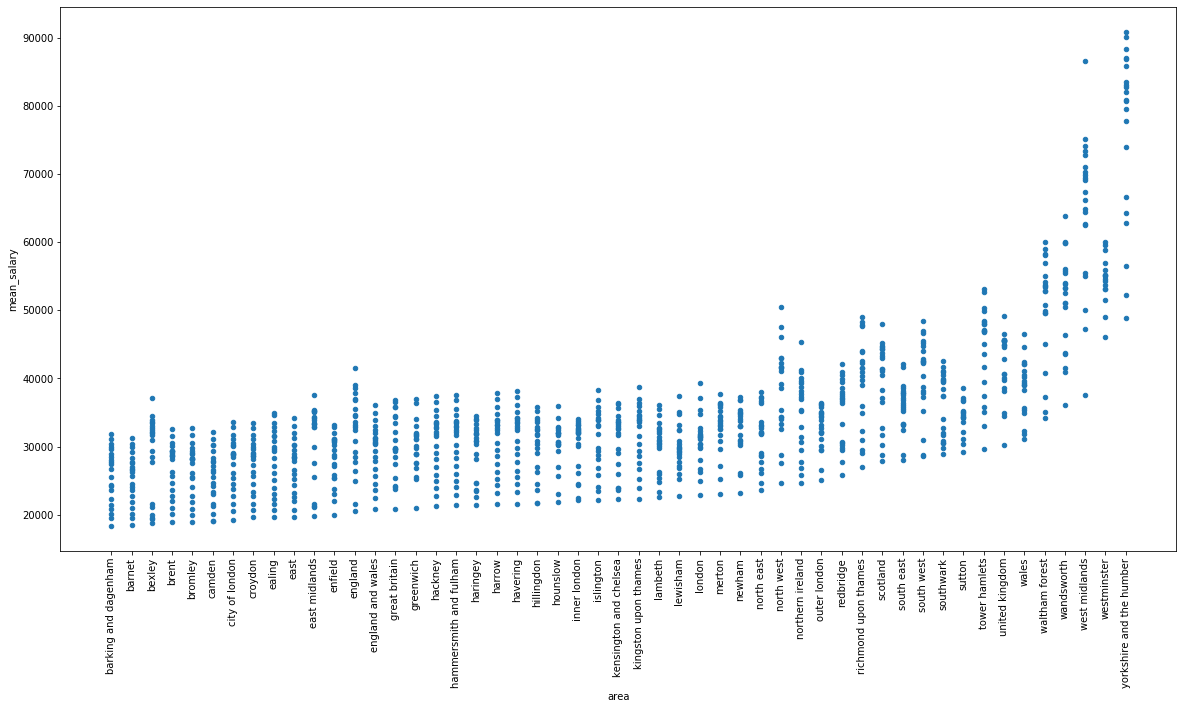

In [86]:
hdf.sort_values('mean_salary').plot(kind='scatter', x ='area', y='mean_salary')
plt.xticks(ticks=mslocation, labels=year99.area, rotation = "vertical");


That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [26]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(100))
some_numbers.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [31]:
some_numbers[some_numbers < 8]

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [32]:
some_numbers[(some_numbers < 4) | (some_numbers > 97)] #this needs the round brackets,
                                                       # not really sure why.

0      0
1      1
2      2
3      3
98    98
99    99
dtype: int64

We can be _really fancy_ too!

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [33]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",         "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca", "guineafowl",         "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal", "turkey", "Goldfish", 
        "rabbit", "Koi", "canary", "Society finch", "Fancy mouse", "Siamese fighting fish",         "Fancy rat and Lab rat", "mink", "red fox", "hedgehog", "Guppy"]

pets_series = pd.Series(pets)
pattern_of_bools = ["o" in x for x in pets_series]
print(pattern_of_bools)

pets_series[pattern_of_bools]

[True, True, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, False, False, False, False, True, False, True, True, False, False, False, True, False, True, False, True, True, False, False, False, True, True, False]


0                   Dog
1                  Goat
9                Donkey
11        Water buffalo
12    Western honey bee
13      dromedary camel
14                Horse
15             silkmoth
16               pigeon
17                goose
22           guineafowl
24         muscovy duck
25         Barbary dove
29             Goldfish
31                  Koi
33        Society finch
34          Fancy mouse
38              red fox
39             hedgehog
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

In [34]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 3000].hist()

NameError: name 'penalty_data' is not defined

Let's see what's under $1000

In [35]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000].hist()

NameError: name 'penalty_data' is not defined

This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [36]:
penalty_data["LEGISLATION"].value_counts()

NameError: name 'penalty_data' is not defined

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

In [37]:
penalty_data["LEGISLATION"].value_counts().plot(kind="bar")

NameError: name 'penalty_data' is not defined

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 
![](http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png)
[img](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)

In [38]:
pdvc = penalty_data["LEGISLATION"].value_counts()
pdvc[pdvc < 5000].plot(kind="bar")

NameError: name 'penalty_data' is not defined

This pattern keeps repeating itself:

In [39]:
pdvc[pdvc < 1000].plot(kind="bar")

NameError: name 'pdvc' is not defined

In [40]:
pdvc[pdvc < 100].plot(kind="bar")

NameError: name 'pdvc' is not defined

In [41]:
pdvc[pdvc < 10].plot(kind="bar")

NameError: name 'pdvc' is not defined

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [42]:
# This bit makes some random data. Ignore it
mu, sigma = 100, 15; x = mu + sigma*np.random.randn(10000)

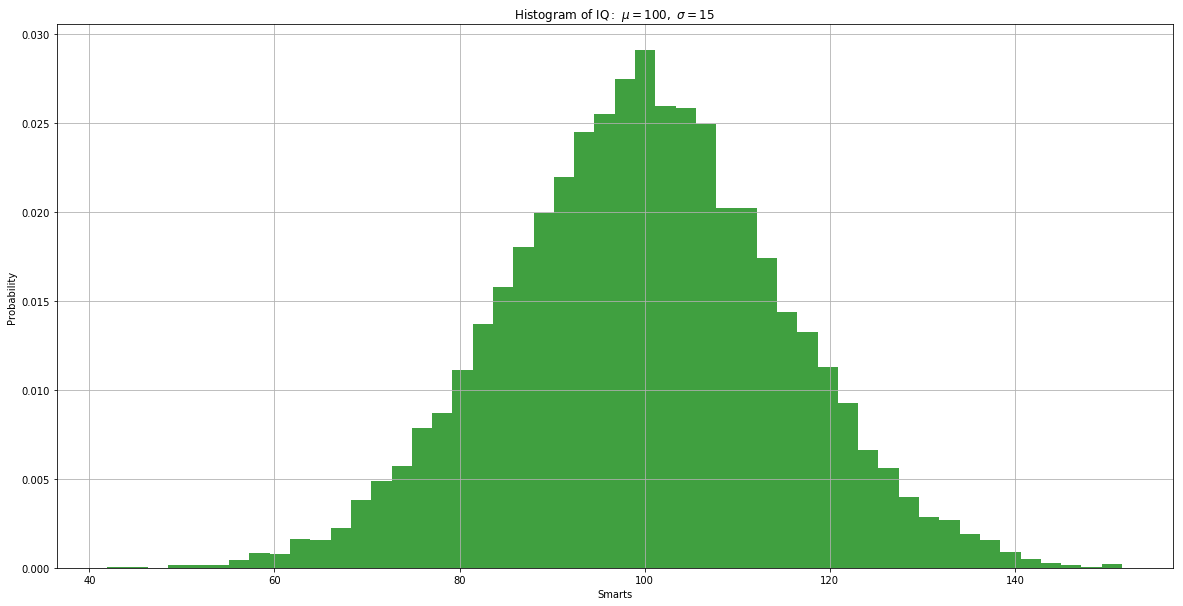

In [71]:
# the histogram of the data
plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

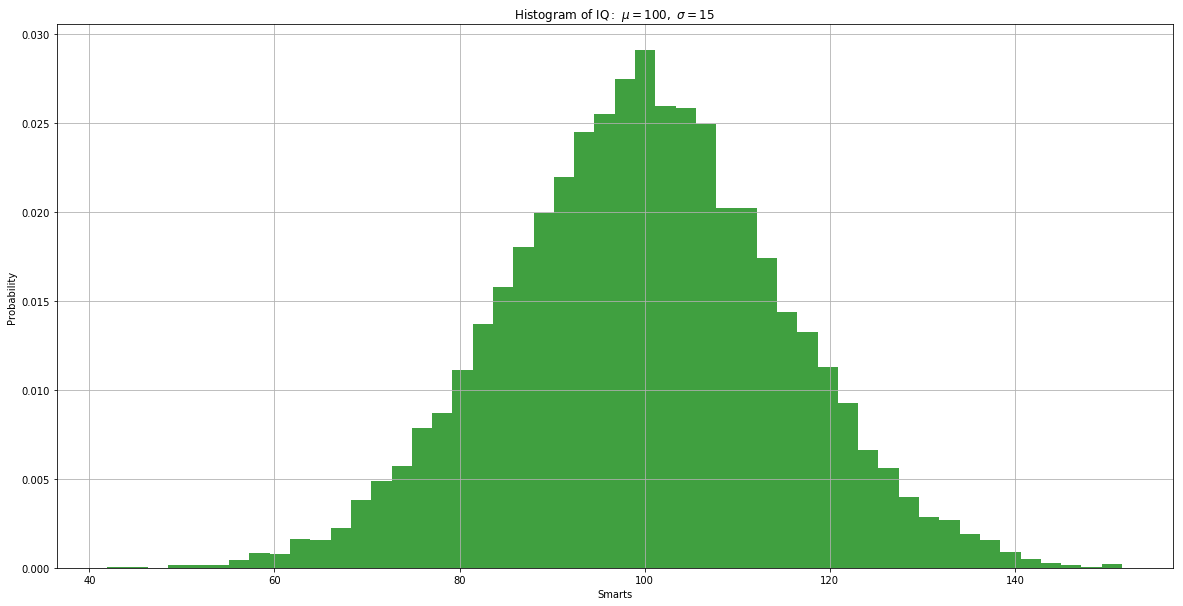

In [72]:
# the histogram of the data
plt.hist(x, 50, density=True, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Here's how we made our histogram before:

In [73]:
penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000].hist()

NameError: name 'penalty_data' is not defined

And this is how we'd change it so that we can add more features:

In [74]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data)
plt.show()

NameError: name 'penalty_data' is not defined

Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

In [75]:
capped_face_value_data = penalty_data["FACE_VALUE"][penalty_data["FACE_VALUE"] < 1000]

plt.hist(capped_face_value_data, bins=10, facecolor='blue', alpha=0.2) #<-old one
plt.hist(capped_face_value_data, bins=50, facecolor='green', alpha=1)  #<-new one
plt.show()

NameError: name 'penalty_data' is not defined

We can go back to our initial, unfiltered, data:

In [76]:
plt.hist(penalty_data["FACE_VALUE"], bins=50)
plt.show()

NameError: name 'penalty_data' is not defined

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

In [77]:
plt.hist(penalty_data["FACE_VALUE"], bins=50, range=(0, 2000))
plt.show()

NameError: name 'penalty_data' is not defined

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

In [78]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.show()

NameError: name 'penalty_data' is not defined

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object:

In [79]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(penalty_data["FACE_VALUE"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Number of fines of a given value issued between {} and {}".format("then", "now"), fontsize=18)
plt.xlabel('$ value of fine', fontsize=26)
plt.ylabel('Count', fontsize=26)
plt.grid(True)
plt.show()

NameError: name 'penalty_data' is not defined

We could get the dates from the dataset if we wanted to be clever about it.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

In [80]:
penalty_data = pd.read_csv(filepath,
                           infer_datetime_format=True,
                           parse_dates=['OFFENCE_MONTH'],
                           dayfirst=True)
penalty_data.head(2)

NameError: name 'filepath' is not defined

This is some straight up, powerful voodoo.

We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

In [81]:
income = penalty_data[["OFFENCE_MONTH","FACE_VALUE"]].groupby("OFFENCE_MONTH").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel('Date', fontsize=26)
plt.ylabel('$ Value', fontsize=26)
plt.grid(True)
plt.show()

NameError: name 'penalty_data' is not defined

In [82]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd

I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# some tricky tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [83]:
ss = penalty_data.loc[:5]

NameError: name 'penalty_data' is not defined

Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [84]:
ss["day"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(1)

NameError: name 'ss' is not defined

Above is equivalent to below, it's up to you to decide what is more readable.

In [85]:
def my_f(x):
    return x.day

ss["day"] = ss.apply(my_f, axis=1)
ss.head(1)

NameError: name 'ss' is not defined

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [86]:
def fold(given):
    """Return canonical versions of inputs."""
    
    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickehead!": ben_name_cannonical
    }

#     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)

print(fold("New-south"))
print(fold("BDoh"))

uni of stairs
Ben Doherty


# _fin_